In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [5]:
pip install --upgrade pandas numpy prophet

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
pip install --upgrade pip setuptools wheel

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
import pandas as pd
from prophet import Prophet

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [8]:
pd.set_option('display.width', 300)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
df = pd.read_csv('Medicaid_data.csv', encoding = 'unicode_escape')

In [10]:
df = df[df['final_report'] == 'Y']   # Need rows that are the final report only
df = df[df['report_date'] != '09/01/2013']    # Remove the date 09/01/2013 since it was the only date before 06/01/2017
df.dropna(subset=['total_medicaid_enrollment'], inplace=True)   # removes the rows that are empty

In [11]:
df = df[['report_date', 'total_medicaid_enrollment']]   # Limit the columns to two only: Report date, and medicaid enrollment
df = df.groupby('report_date').agg('sum').reset_index()     # This will sum the number of medicaid enrollment for every single date
df = df.rename(columns={'report_date':'ds','total_medicaid_enrollment':'y'})    # Rename columns to the ones that Prophet require. Note: Prophet requires the date to be named as 'ds', and targeted data as 'y'
print(df.head())


           ds           y
0  01/01/2018  56443904.0
1  01/01/2019  64618025.0
2  01/01/2020  64574189.0
3  01/01/2021  73882223.0
4  01/01/2022  80165500.0


In [12]:
model = Prophet()  # Create the model
model.fit(df)      # Train the model

12:02:22 - cmdstanpy - INFO - Chain [1] start processing
12:02:23 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods = 365 *10)

In [14]:
forecast = model.predict(future)

In [16]:
import matplotlib.pyplot as plt

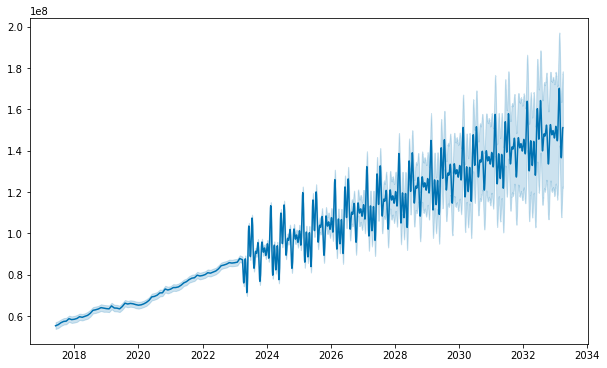

In [18]:
import matplotlib.pyplot as plt

# Ensure dates, yhat, yhat_lower, and yhat_upper are numpy arrays
dates_np = dates.to_numpy()
yhat_np = yhat.to_numpy()
yhat_lower_np = yhat_lower.to_numpy()
yhat_upper_np = yhat_upper.to_numpy()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot_date(dates_np, yhat_np, '-', label='Forecast', color='#0072B2')
plt.fill_between(dates_np, yhat_lower_np, yhat_upper_np, color='#0072B2', alpha=0.2)

# Additional plotting configurations if needed
# ...

plt.show()
